# SA 2 - Comparing Memory Day Errors on Drug Treatments and AD Status
KARL ISAIAH BUENAFE 

In [3]:
import numpy as np
import scipy.stats as spt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import AnovaRM

In [2]:
df= pd.read_csv('Alzheimers Mice Data.csv')
df.head(10)

,AD_Status,Treatment,Training,Memory
0,1,1,12,10
1,1,1,15,12
2,1,1,13,13
3,1,1,12,10
4,1,1,14,13
5,1,2,15,13
6,1,2,17,13
7,1,2,16,14
8,1,2,17,15
9,1,2,14,11


### ASSUMPTIONS

Assumption 1. The dependent variable is measured at the continuous level.

Assumption 2. The two independent variables (AD Status and Treatment) consists of two or more categorical independent groups. The AD Status is the dichotomous variable, whereas the Treatment is the polytomous variable. 

Assumption 3. The independence of observations among each group of the independent variable or between the group themselves is observed. 

Assumption 4. There should be no significant outliers.

Assumption 5. The  dependent variable should be normally distributed.

Assumption 6. The variance of the dependent variable should be equal.

## INTRODUCTION
This report examines the effect Alzheimer's Disease(AD) and or Medical treat to training errors. Errors were measure as th enumber of errors committed during training.

### Independent Variables:

#### AD Status: Categorized using 1 and 2. 
    1: The mice has AD
    2: The mice does not have AD
#### Treatment: categorized into 4 groups (i.e. 1, 2, 3, and 4 )

#### Main Effect of AD Status

NULL HYPOTHESIS  $(H_0)$ : There's no significant difference on the memory day error of those with AD than those without.

ALTERNATIVE HYPOTHESIS  $(H_1)$ : There is a significant difference on the memory day error of those with AD than those without.

#### Main Effect of Treatment
NULL HYPOTHESIS  $(H_0)$ : There's no significant difference on the memory day error among the treatments.

ALTERNATIVE HYPOTHESIS  $(H_1)$ : There is a significant difference on the memory day error among the treatments.


#### Interaction between AD Status and Treatment
NULL HYPOTHESIS  $(H_0)$ : There is no significant interaction between AD Status and Treatment on memory day score.

ALTERNATIVE HYPOTHESIS  $(H_1)$ : There's a significant interaction between AD Status and Treatment on memory day score.

### DESCRIPTIVE ANALYSIS 

In [12]:
df['Memory'].describe()

count    40.0000
mean      9.9250
std       2.7399
min       4.0000
25%       8.0000
50%      10.0000
75%      12.0000
max      15.0000
Name: Memory, dtype: float64

Remark: The dataset has 2 independent variables. One has two groups while the other has 4. And based on the table above, we can see that the dependent variable is continous. Therefore, 
##### Assumption 1 and Assumption 2 was met.

In [18]:
tr1 = df[df['Treatment']== 1]
tr2 = df[df['Treatment']== 2]
tr3 = df[df['Treatment']== 3]
tr4 = df[df['Treatment']== 4]
ad1 = df[df['AD_Status']== 1]
ad2 = df[df['AD_Status']== 2]


In [19]:
result = df.groupby(['AD_Status', 'Treatment']).agg(mean_memory=('Memory', 'mean')).reset_index()

result.head(10)

,AD_Status,Treatment,mean_memory
0,1,1,11.6
1,1,2,13.2
2,1,3,12.4
3,1,4,11.2
4,2,1,8.6
5,2,2,7.6
6,2,3,8.2
7,2,4,6.6


Remark: Based on the table we can see that each category of the independependent variables are observed within each other. Therefore,
##### Assumption 3 was met.

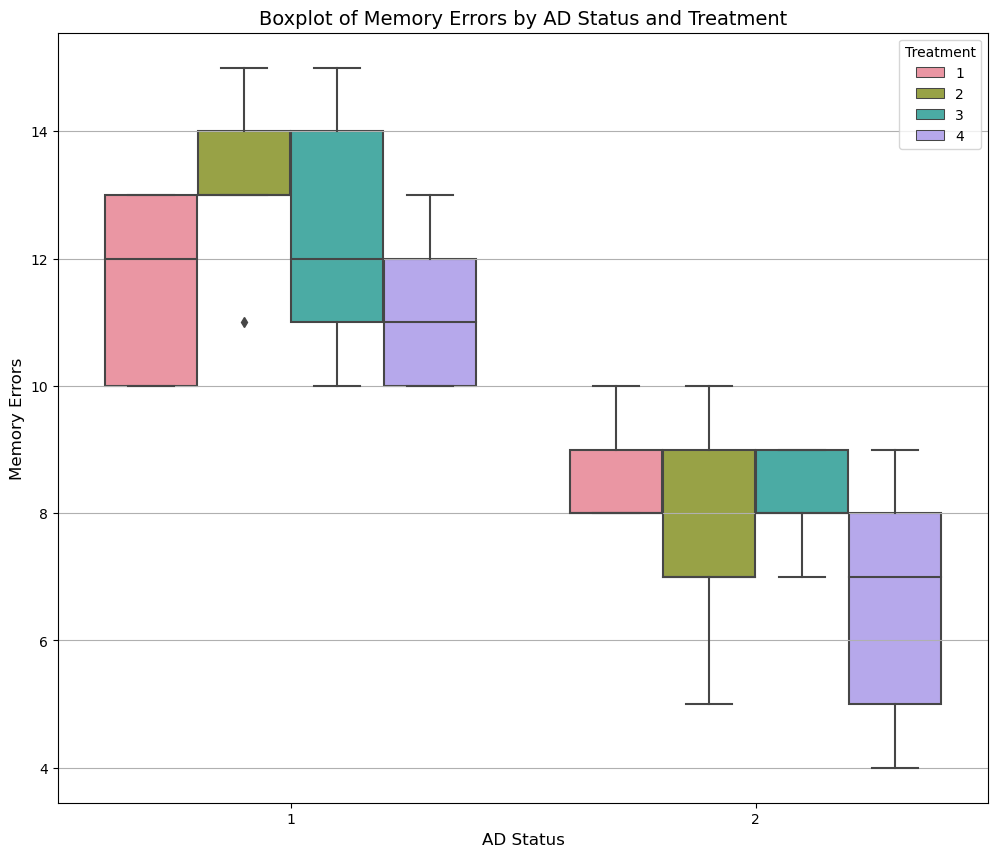

In [24]:

palette=["#276733",'#F28BAB', '#F2CA22']
plt.figure(figsize=(12, 10))
sns.boxplot(
    data=df,
    x='AD_Status',
    y='Memory',
    hue='Treatment',  
    palette=sns.set_palette(palette))


plt.title("Boxplot of Memory Errors by AD Status and Treatment", fontsize=14)
plt.xlabel("AD Status", fontsize=12)
plt.ylabel("Memory Errors", fontsize=12)
plt.grid(axis='y')

plt.show()

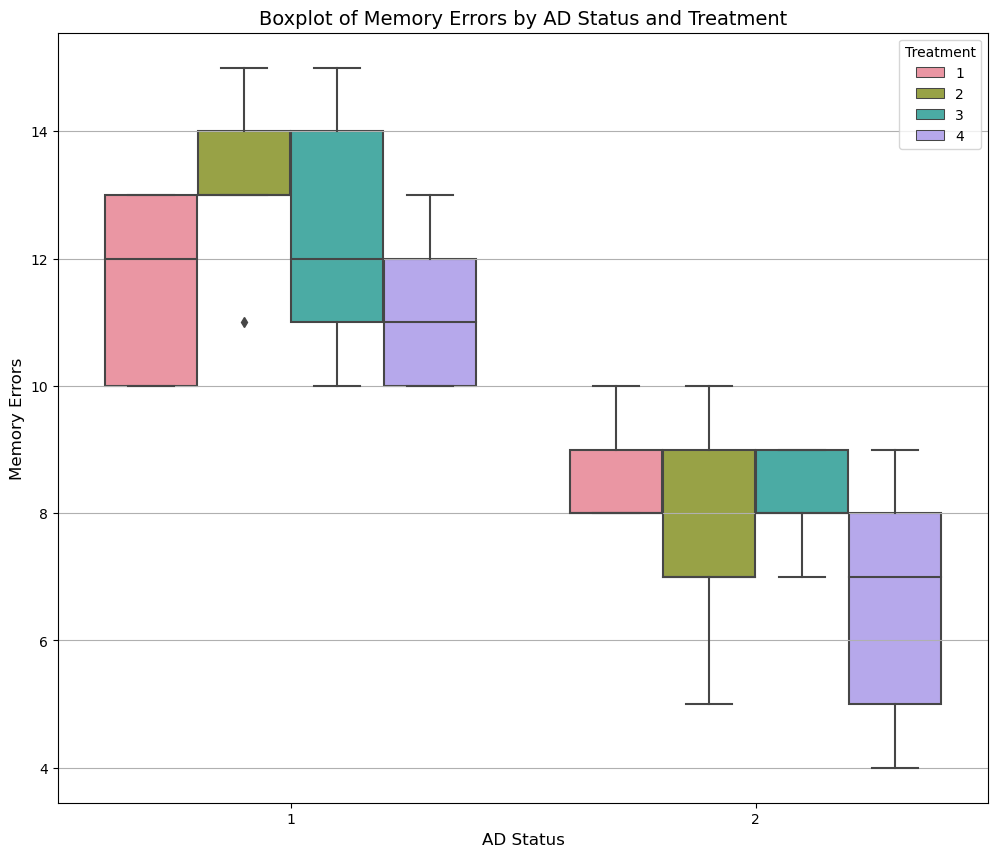

In [25]:
def remove_outliers(df):
    filtered_columns = {}
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
       
        filtered_columns[col] = df[col][(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    return pd.DataFrame(filtered_columns)

filtered_data = remove_outliers(df)

palette=["#276733",'#F28BAB', '#F2CA22']
plt.figure(figsize=(12, 10))
sns.boxplot(
    data=filtered_data,
    x='AD_Status',
    y='Memory',
    hue='Treatment',  
    palette=sns.set_palette(palette))


plt.title("Boxplot of Memory Errors by AD Status and Treatment", fontsize=14)
plt.xlabel("AD Status", fontsize=12)
plt.ylabel("Memory Errors", fontsize=12)
plt.grid(axis='y')

plt.show()


based on the initial box plot, we can see that there's an outlier, but upon utilizing IQR to eliminate the outliers, and creating another plot, it implies that this outlier is not significant. Therefore, 
<strong>Assumption 4 was met.</strong>


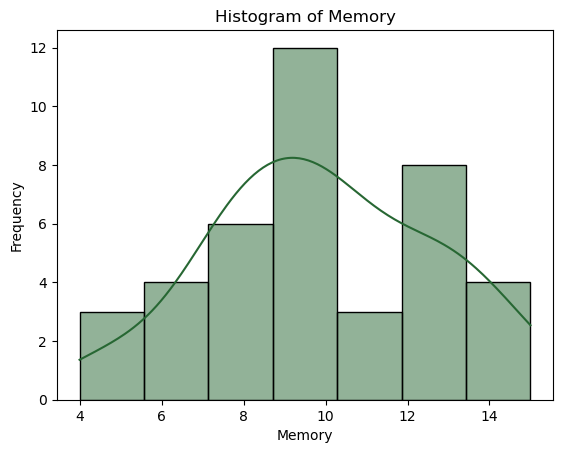

In [26]:
sns.histplot(df['Memory'], kde=True)
plt.title("Histogram of Memory")
plt.xlabel("Memory")
plt.ylabel("Frequency")
plt.show()

Remark: The result of this histogram shows how the Memory error is approximately distributed normally. So, <strong>Assumption 5 was achieved but with caution.</strong>

In [29]:
grouped = df.groupby(['AD_Status', 'Treatment'])['Memory']

groups = [group for _, group in grouped]


stat, p = spt.levene(*groups)

print(f"Levene Test Statistic: {stat:.3f}, p-value: {p:.3f}")

Levene Test Statistic: 0.827, p-value: 0.572


Remark: With the p-value greater than 0.05, it implies that variance are evenly distributed. Therefore,  <strong> Assumption 6 was met.</strong>

### INFERENTIAL ANALYSIS

### Two-way ANOVA:

In [32]:
model = ols('Memory ~ C(AD_Status) + C(Treatment) + C(AD_Status):C(Treatment)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2) 
print(anova_table)

                            sum_sq    df          F        PR(>F)
C(AD_Status)               189.225   1.0  75.313433  6.449421e-10
C(Treatment)                14.475   3.0   1.920398  1.461176e-01
C(AD_Status):C(Treatment)    8.675   3.0   1.150912  3.436263e-01
Residual                    80.400  32.0        NaN           NaN


## DISCUSSION

Based on the results of the two-way ANOVA, we interpreted the following:
1. The AD status has a significant effect on the memory error.
2. The Treatment does not have a significant effect on the memory error.
3. The interaction of the 2 independent variables does not have a significant effect on the dependent variable.

## CONCLUSION

After conducting this statistical analysis, we can conclude the following:

There is a significant difference on the memory day error of those with AD than those without. Therefore, <strong>we must reject the null hypothesis $(H_0)$.</strong>

  
There is no significant difference on the memory day error among the 4 treatment groups. Therefore, <strong>we must accept the null hypothesis $(H_0)$.</strong>

  

There is no significant interaction between the two independent variables on the memory day error. Therefore, <strong>we must accept the null hypothesis $(H_0)$.</strong>
